In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:

df.columns = df.columns.str.strip()

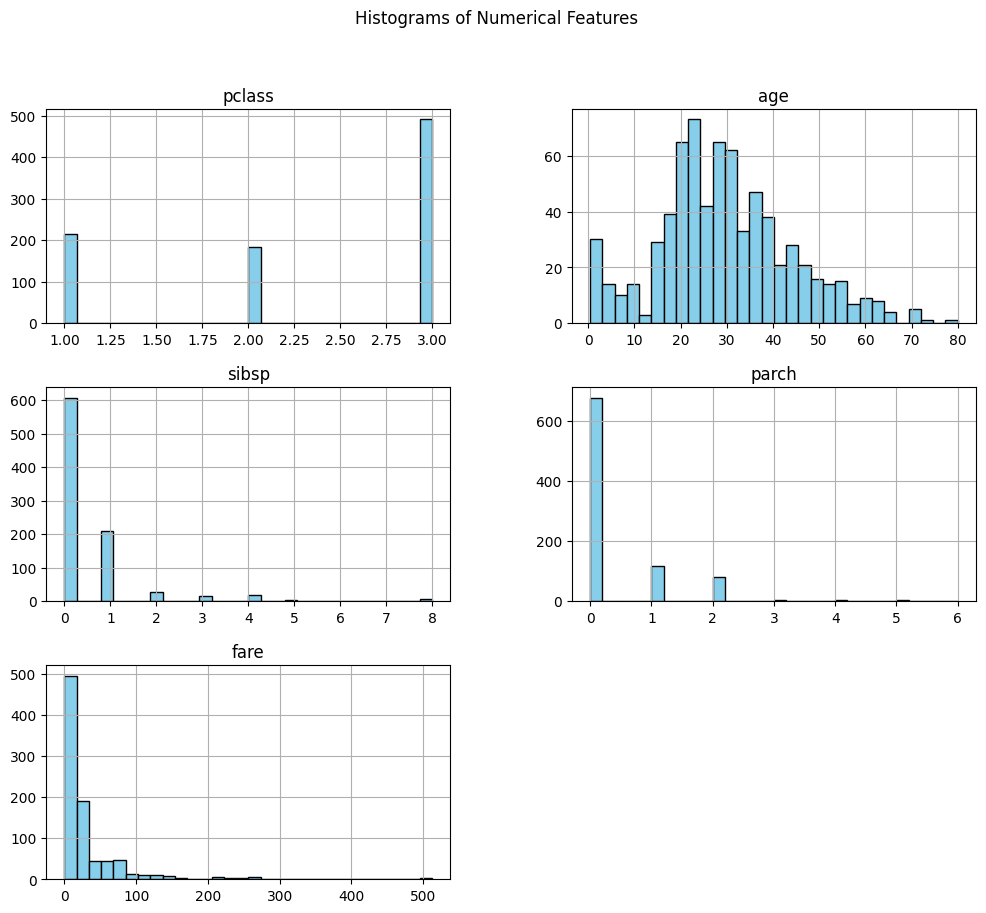

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('survived')  # remove target from distribution
df[num_cols].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

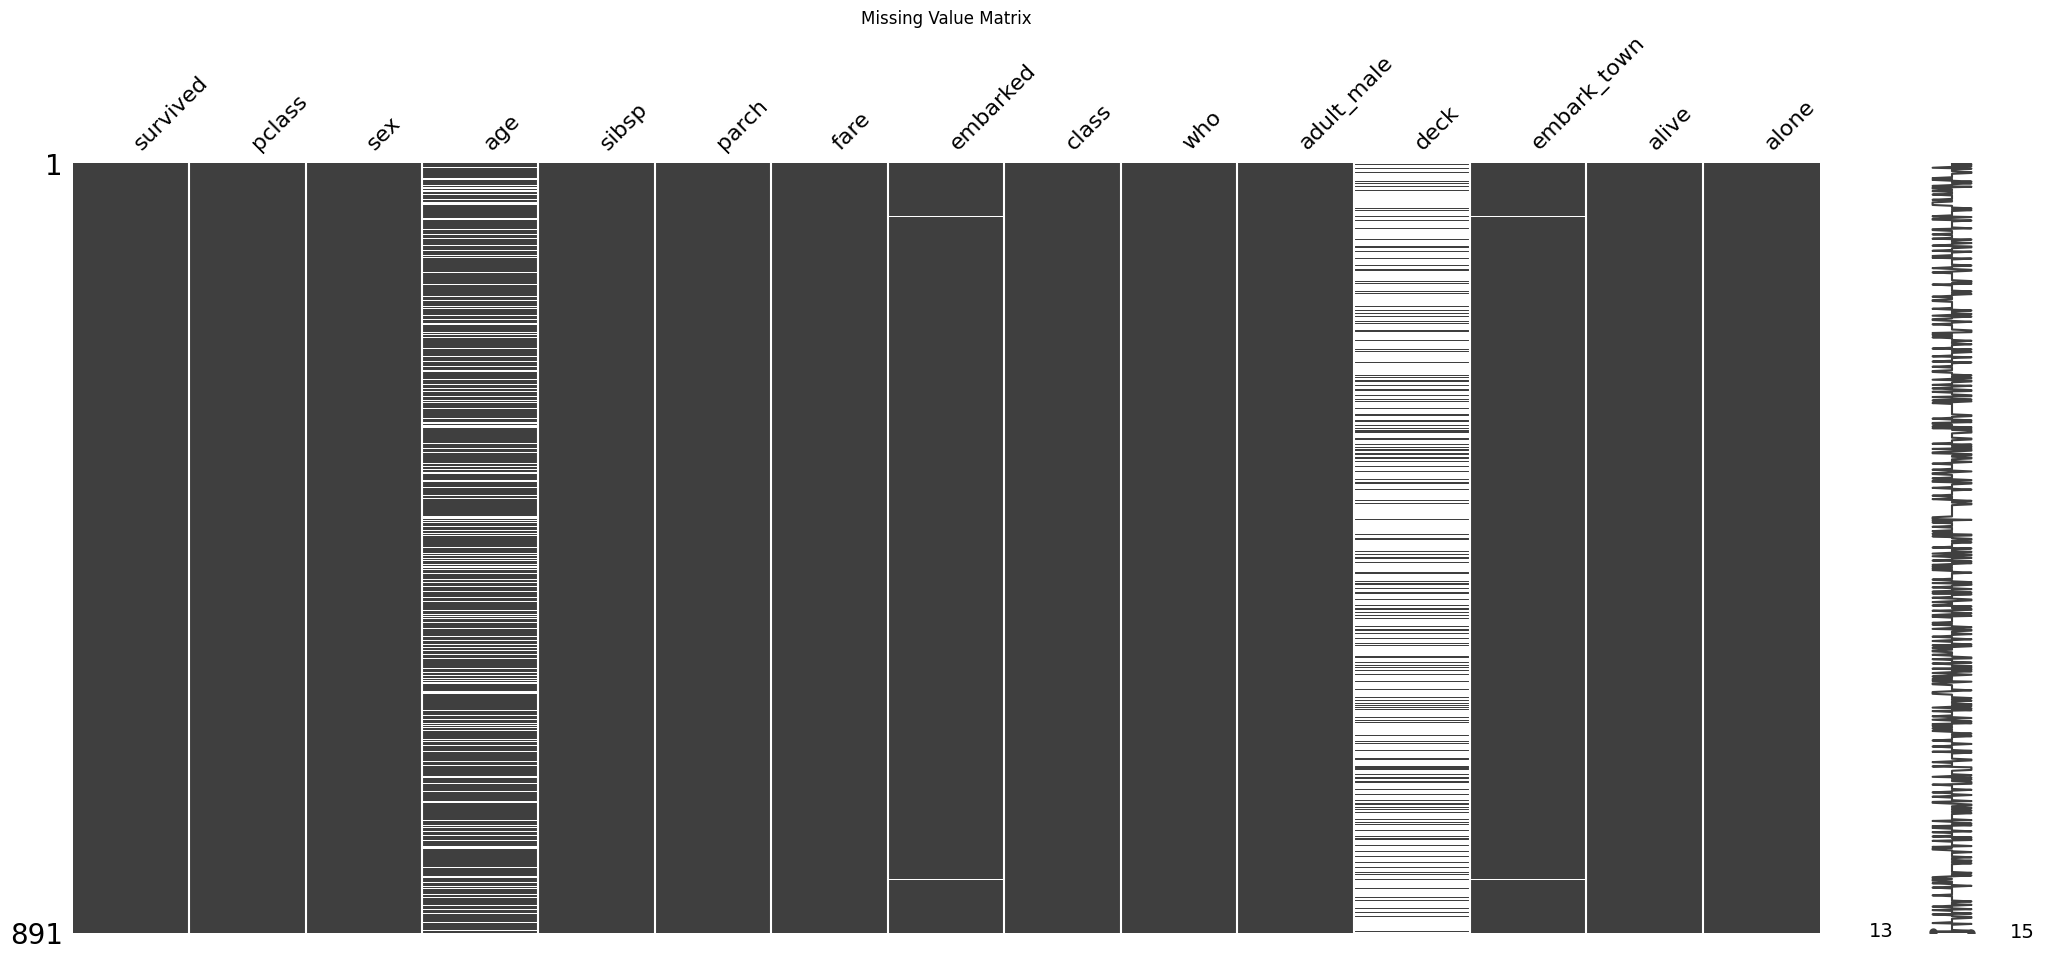

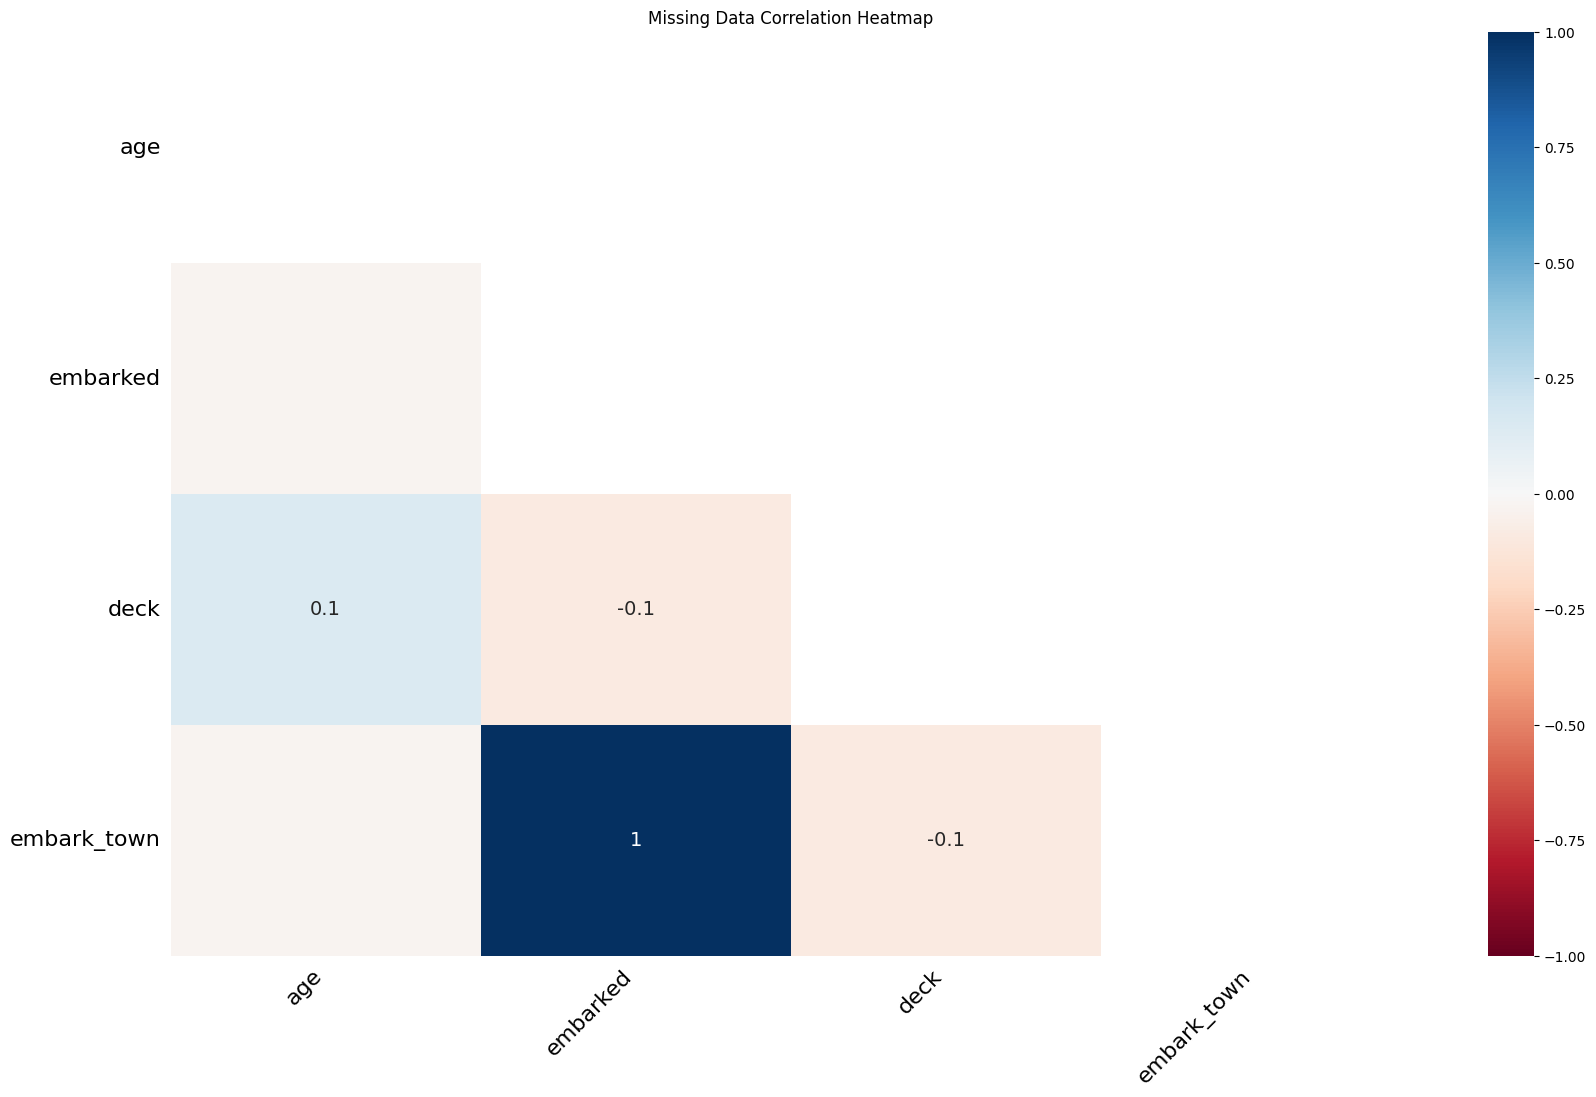

In [6]:
import missingno as msno

msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

msno.heatmap(df)
plt.title("Missing Data Correlation Heatmap")
plt.show()

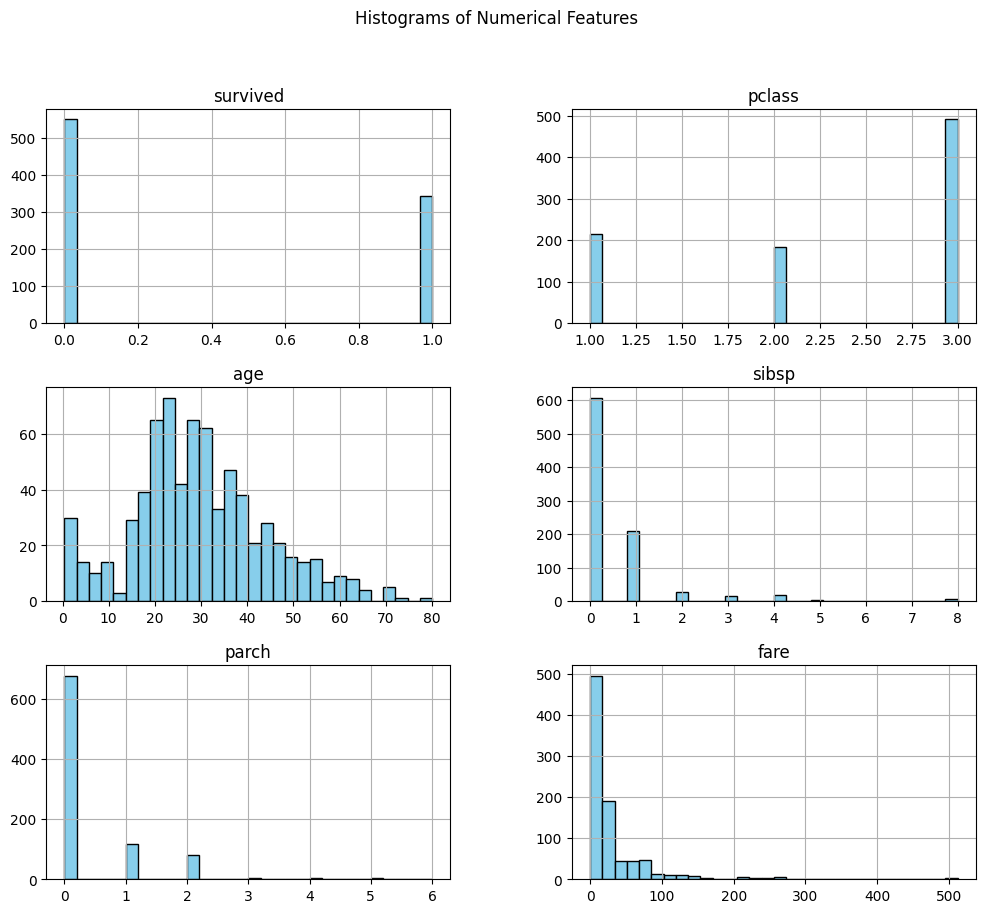

In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[num_cols].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

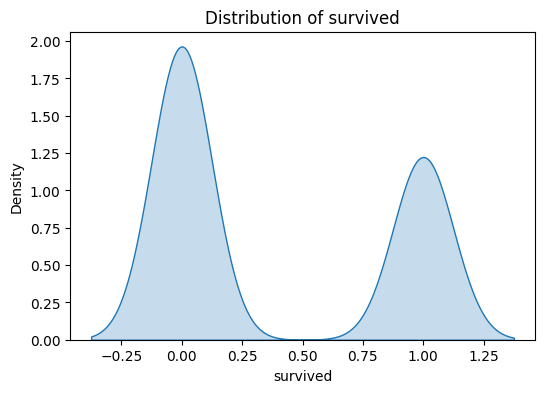

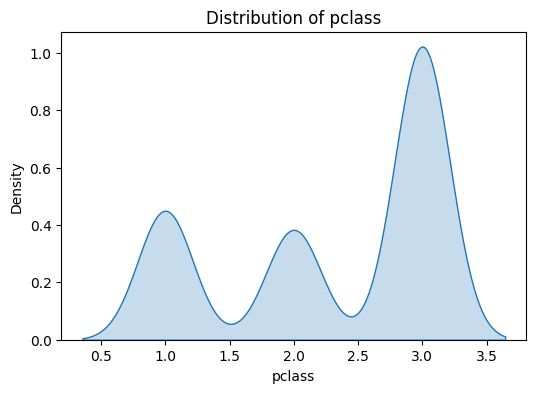

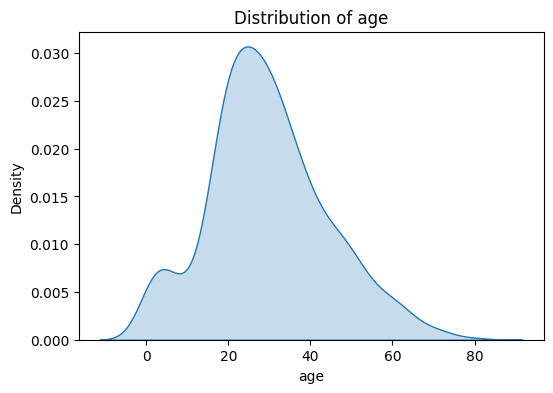

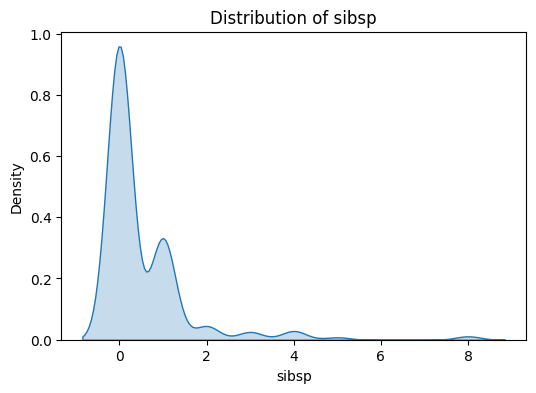

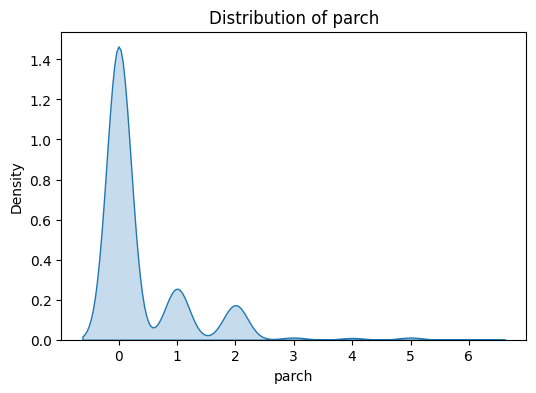

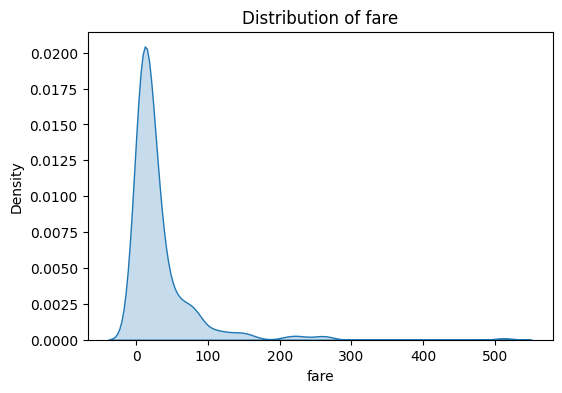

In [9]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()


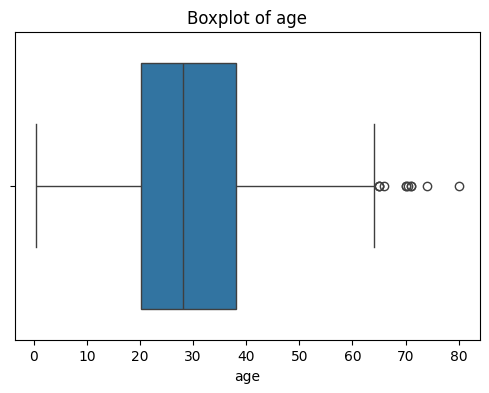

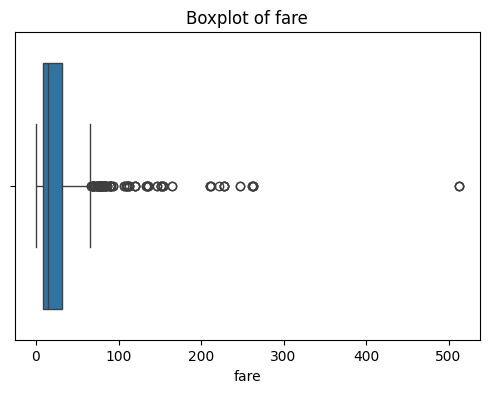

In [17]:
for col in ['age', 'fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

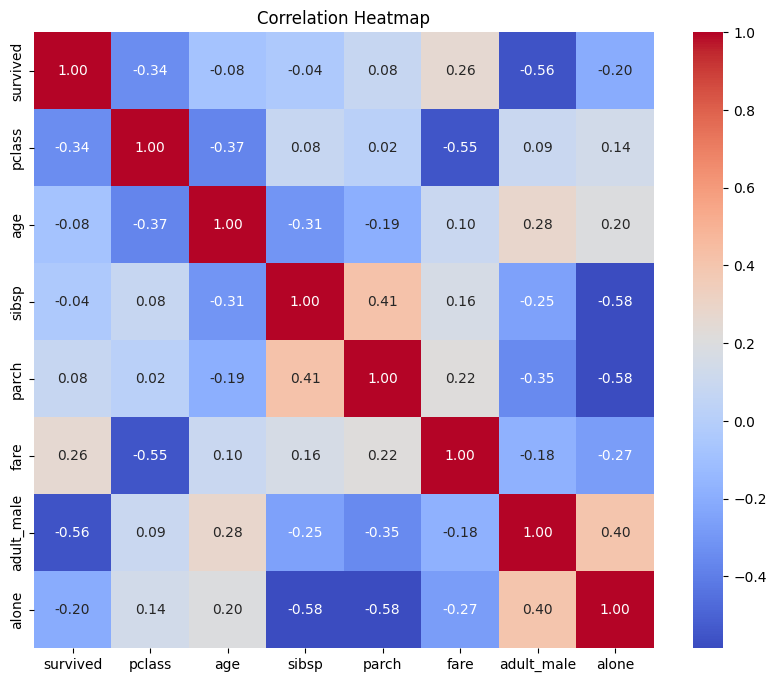

In [18]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

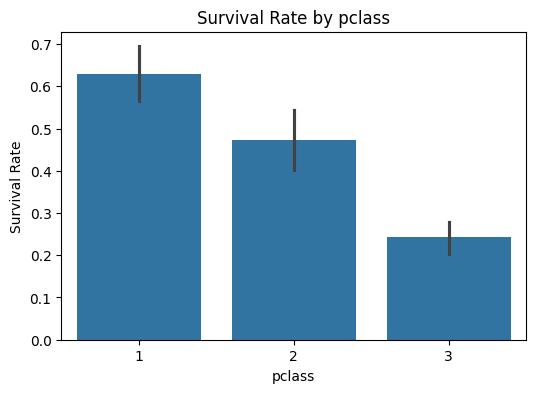

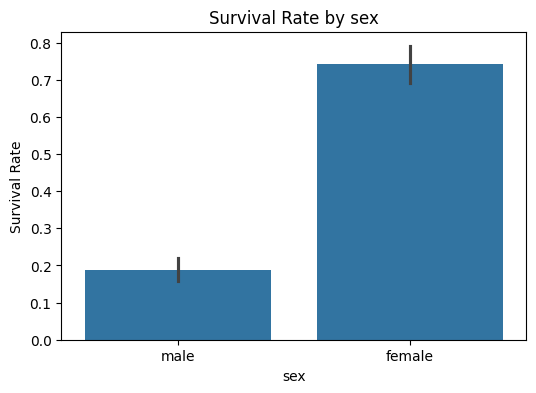

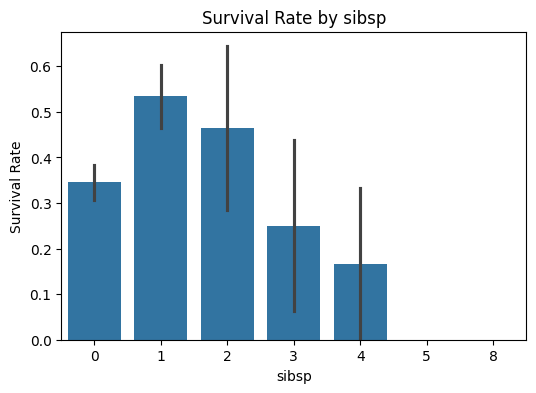

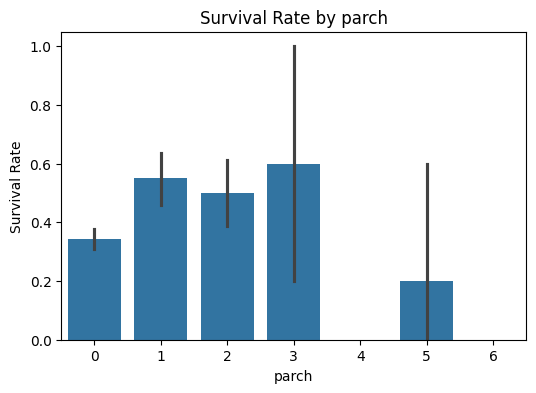

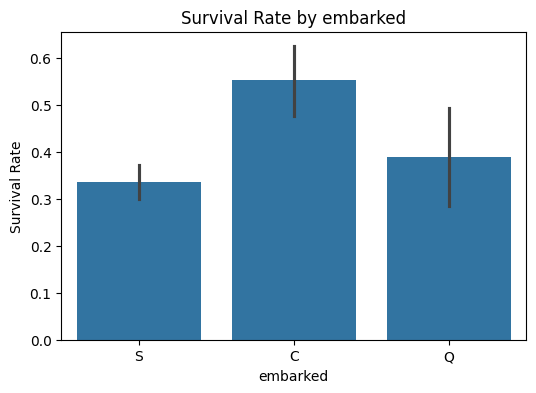

In [21]:
cat_cols = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=col, y='survived')
    plt.title(f'Survival Rate by {col}')
    plt.ylabel("Survival Rate")
    plt.show()

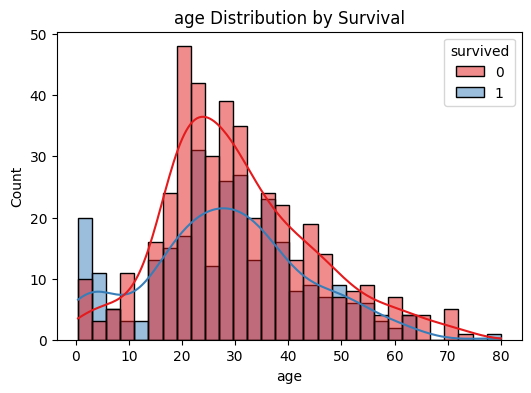

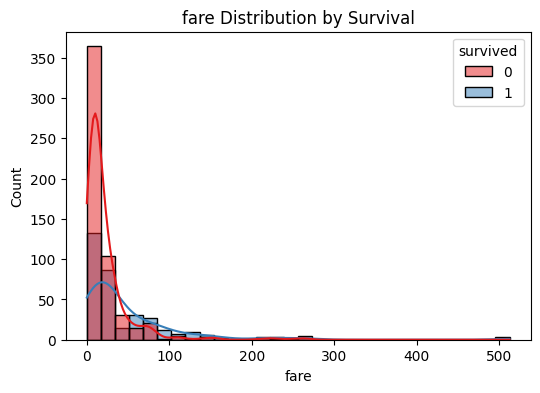

In [23]:
for col in ['age', 'fare']:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='survived', kde=True, bins=30, palette='Set1')
    plt.title(f'{col} Distribution by Survival')
    plt.show()

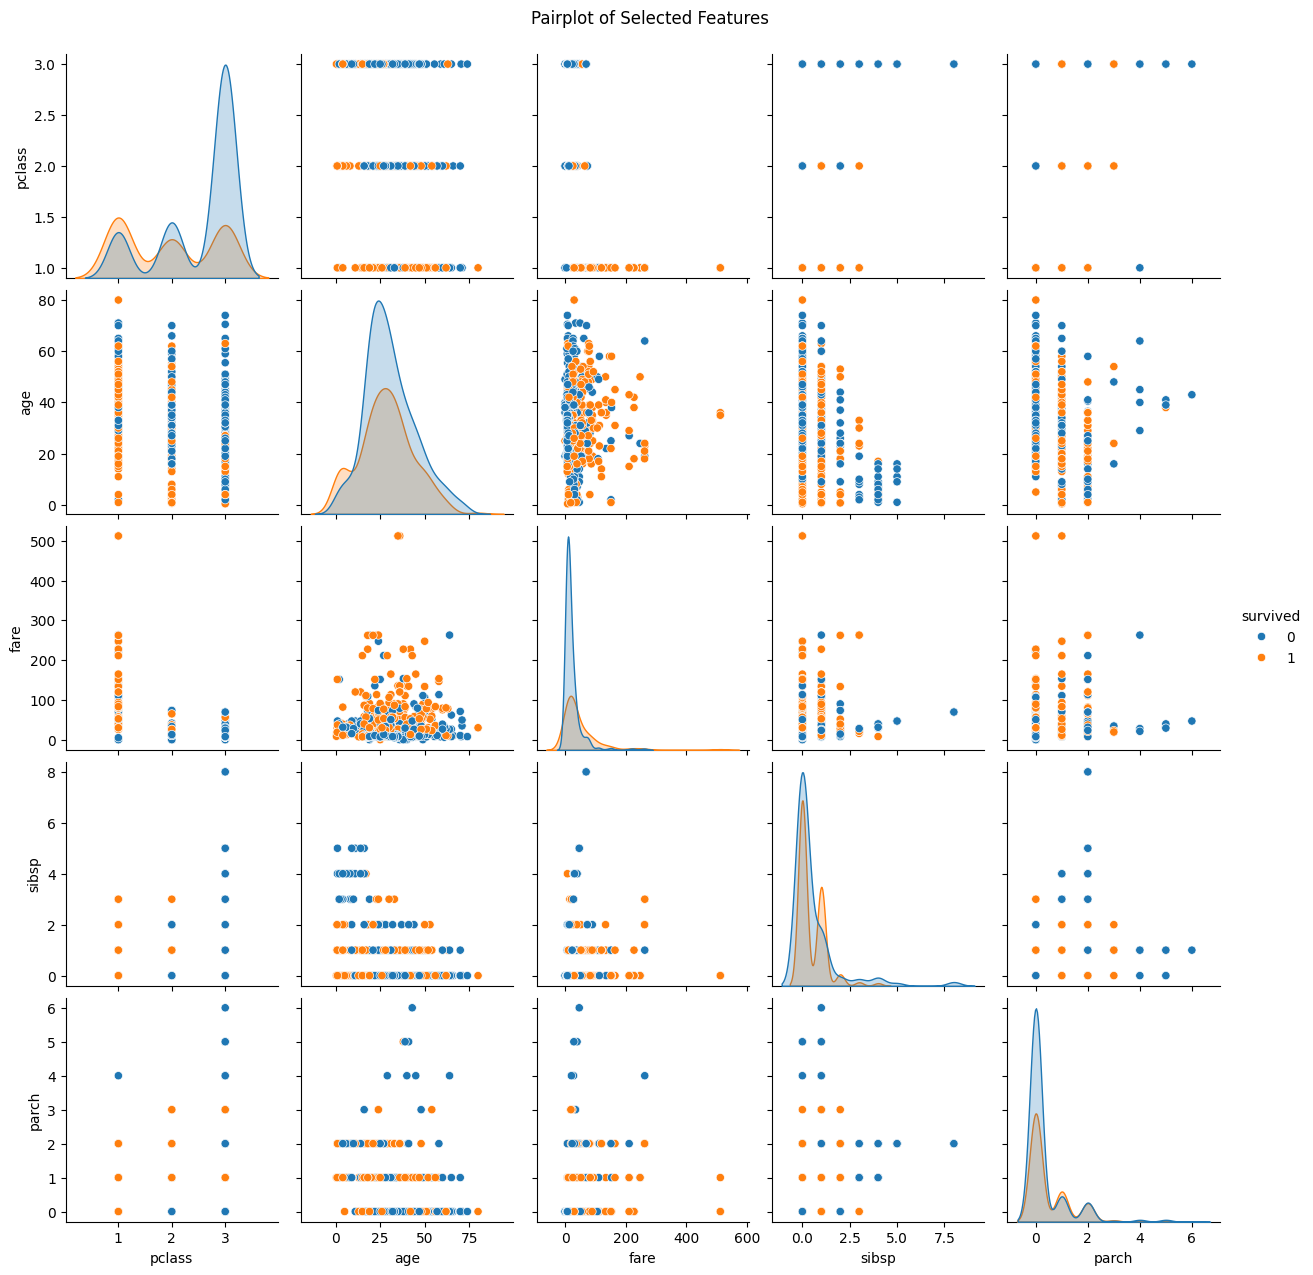

In [25]:
sns.pairplot(df[['survived', 'pclass', 'age', 'fare', 'sibsp', 'parch']], hue='survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()